<a href="https://colab.research.google.com/github/jnetoass/water_quality/blob/main/water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir /content/.kaggle

In [2]:
import json

token = {"username":"netoassunao","key":"947383512cf2cfd01f88b368b68752a7"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
#Configure the file
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d adityakadiwal/water-potability -p /content

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 34.1MB/s]


In [7]:
import os
import zipfile

local_zip = '/content/water-potability.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/water-potability')
zip_ref.close()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [50]:
dadosDF = pd.read_csv('/water-potability/water_potability.csv')
dadosDF.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
dadosDF.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [51]:
dadosDF['ph'] = dadosDF['ph'].fillna(dadosDF['ph'].median())
dadosDF['Sulfate'] = dadosDF['Sulfate'].fillna(dadosDF['Sulfate'].median())
dadosDF['Trihalomethanes'] = dadosDF['Trihalomethanes'].fillna(dadosDF['Trihalomethanes'].median())
dadosDF.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [32]:
dadosDF['feature'] = dadosDF['Hardness']/dadosDF['Chloramines']
dadosDF.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,feature
0,2.084025,5.327344,9.942339,2.116281,5.912195,6.337372,2.431838,4.477234,1.377035,0,2.517314
1,1.550978,4.870782,9.832585,2.032775,5.811361,6.386686,2.783777,4.048808,1.704867,0,2.396125
2,2.208178,5.417150,9.899005,2.329800,5.811361,6.039317,2.883047,4.210943,1.400181,0,2.325157
3,2.231816,5.372373,9.999680,2.203795,5.880215,5.897886,2.967154,4.618498,1.727891,0,2.437782
4,2.311765,5.204564,9.797015,2.021097,5.740229,5.989990,2.530380,3.496447,1.624341,0,2.575118


In [14]:
!pip install lucifer-ml
from luciferml.preprocessing import Preprocess as prep

     |████████████████████████████████| 69.2MB 41kB/s 


Started Corrector 


Skewness in numerical features: 

                 Skewness
Solids           0.621350
Conductivity     0.264369
ph               0.041248
Organic_carbon   0.025521
Turbidity       -0.007813
Chloramines     -0.012093
Sulfate         -0.027265
Hardness        -0.039324
Trihalomethanes -0.087249
Skewness Before Transformation for Solids:  0.6216344855169127 

Mean before Transformation for Solids : 22014.092526077104, Standard Deviation before Transformation for Solids : 8767.23242117998 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



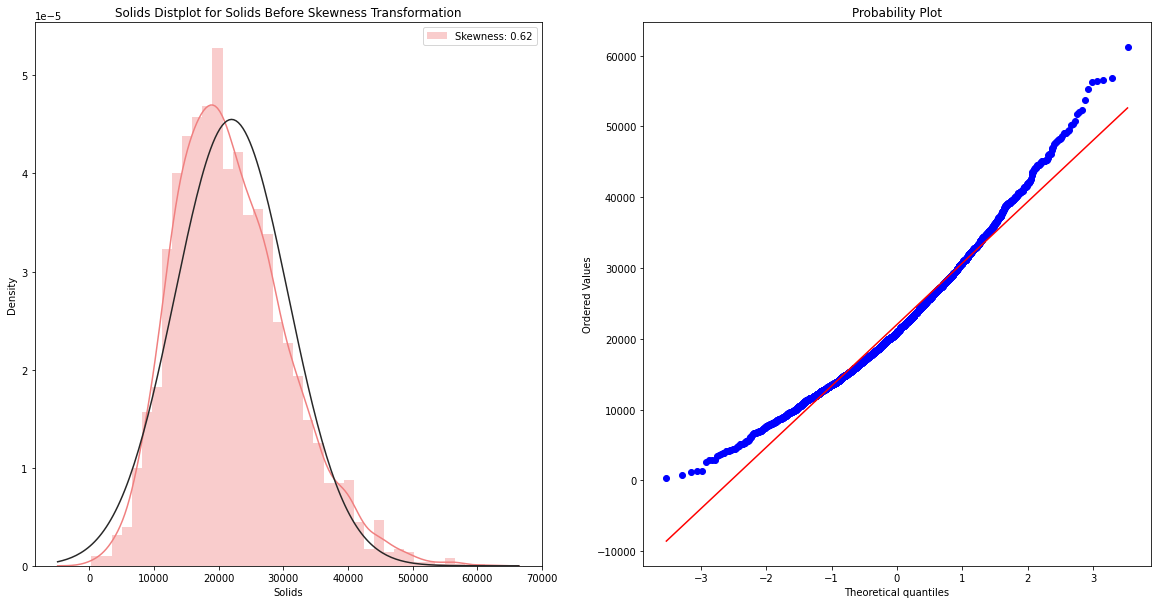

Skewness After Transformation for Solids:  -1.1350665820895602 

Mean before Transformation for Solids : 9.911939065053325, Standard Deviation before Transformation for Solids : 0.44532398301279424 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



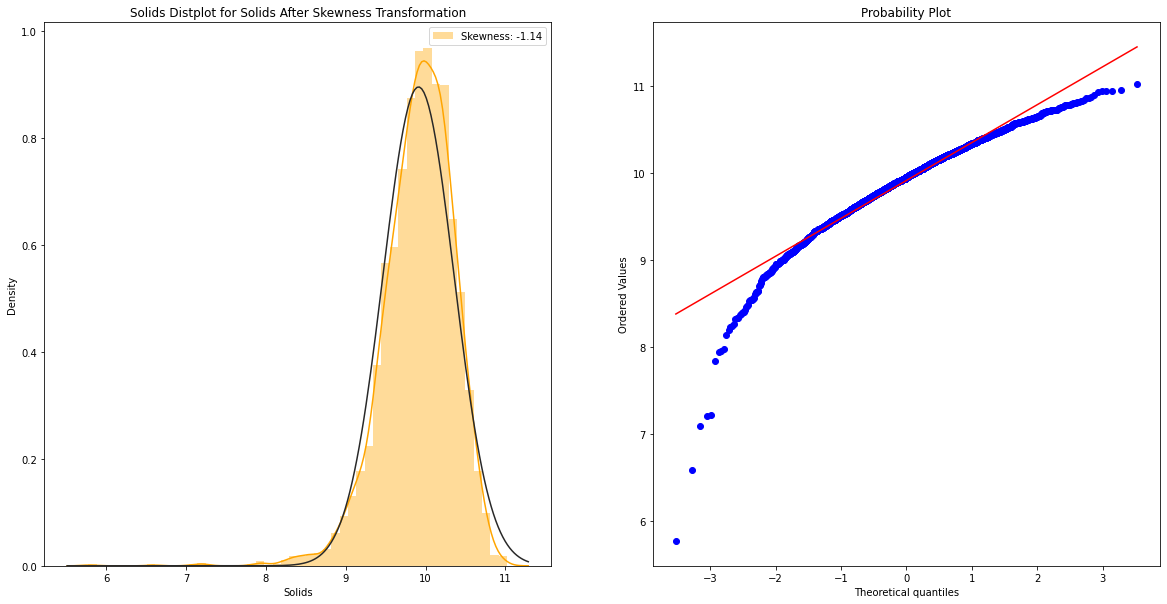

Skewness Before Transformation for Conductivity:  0.2644902239264119 

Mean before Transformation for Conductivity : 426.20511068255325, Standard Deviation before Transformation for Conductivity : 80.81172732448097 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



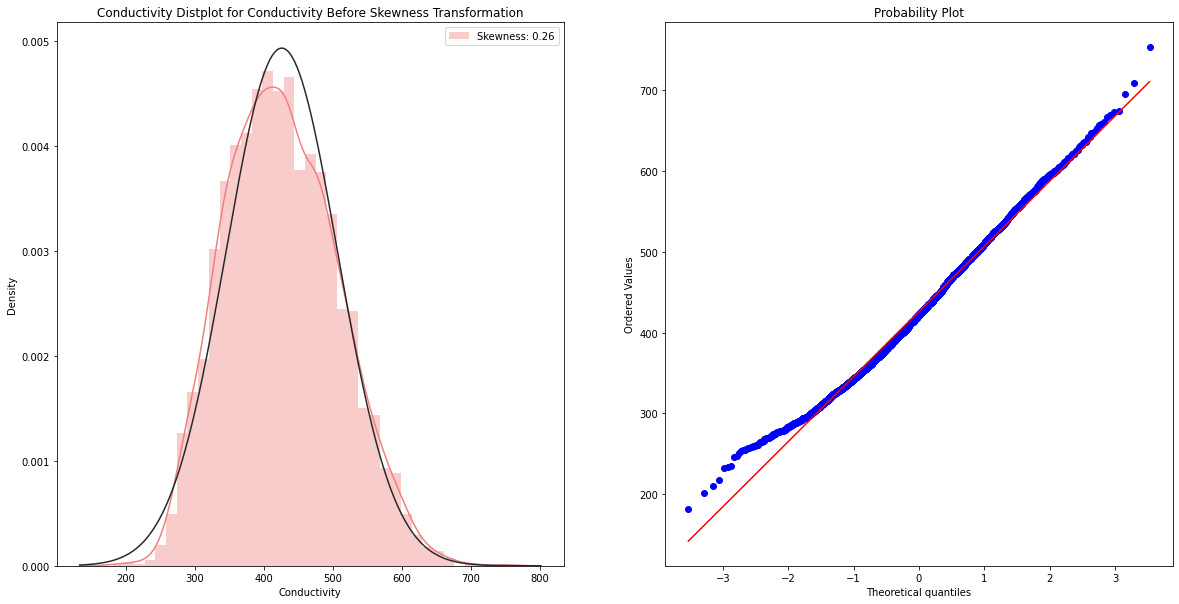

Skewness After Transformation for Conductivity:  -0.20698467950343657 

Mean before Transformation for Conductivity : 6.039119631918481, Standard Deviation before Transformation for Conductivity : 0.1918430867139411 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



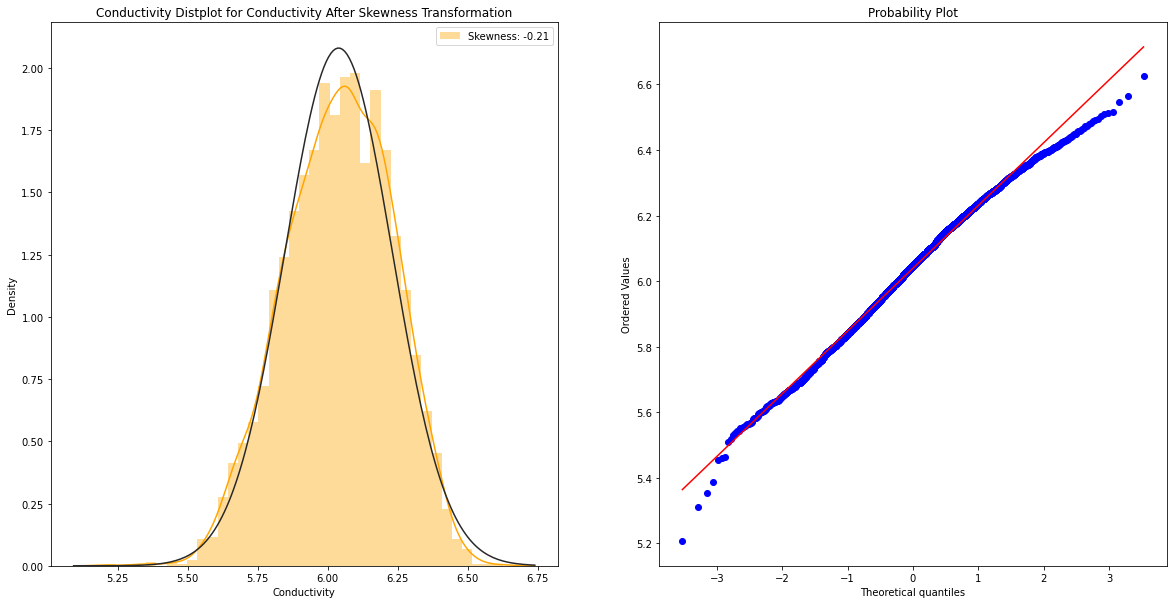

Skewness Before Transformation for ph:  0.04126642303478952 

Mean before Transformation for Ph : 7.074193521792814, Standard Deviation before Transformation for Ph : 1.4698156780905247 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



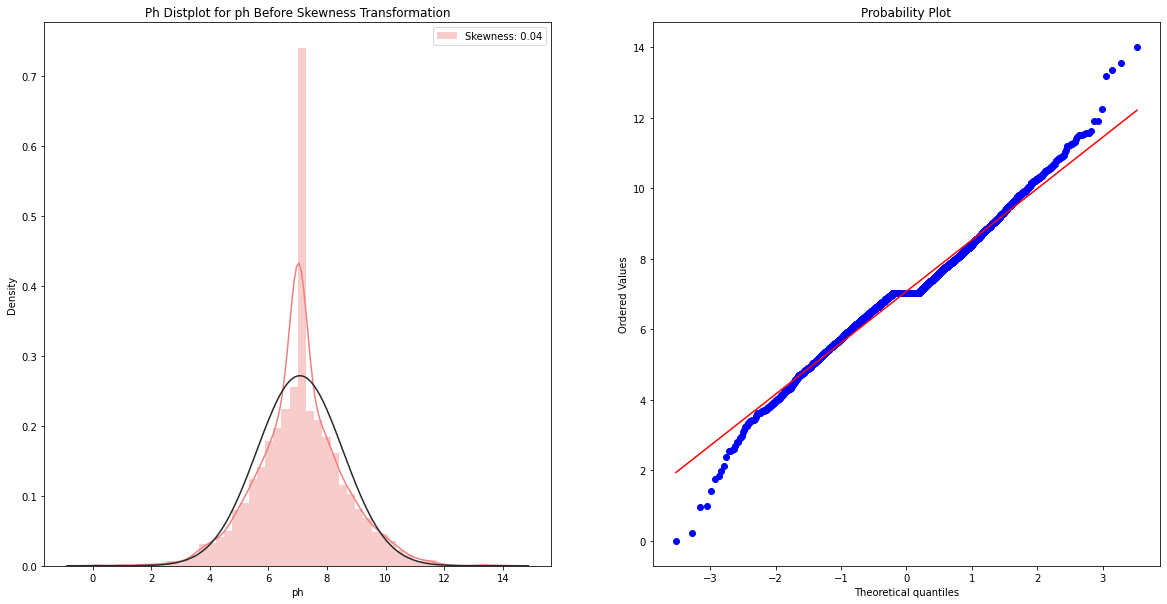

Skewness After Transformation for ph:  -1.4814679347694377 

Mean before Transformation for Ph : 2.070547275056485, Standard Deviation before Transformation for Ph : 0.19796299536658965 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



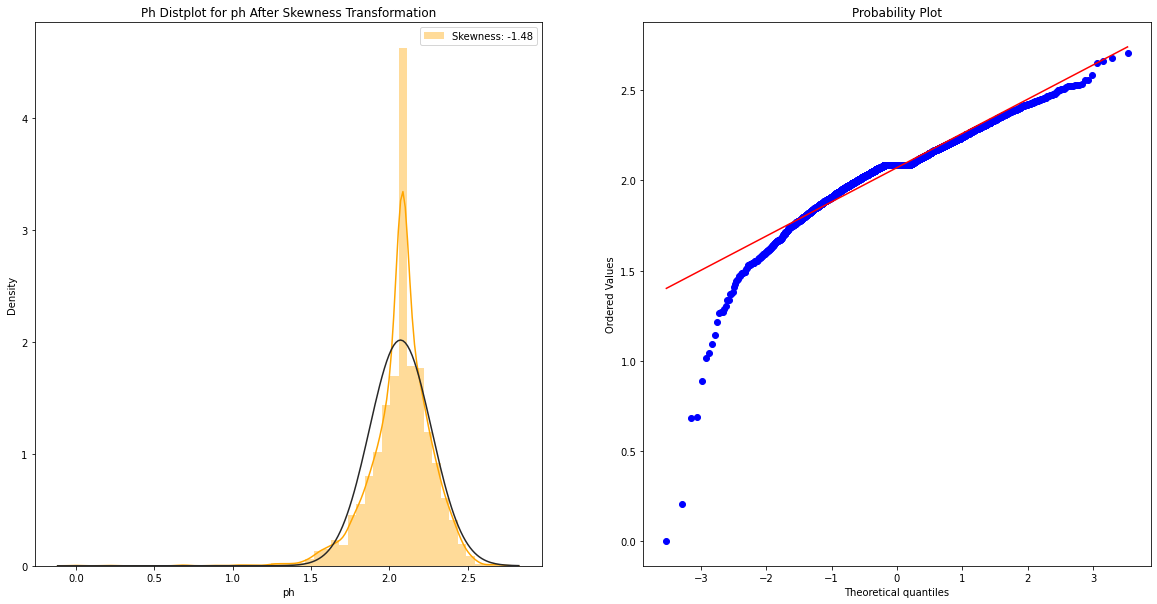

Skewness Before Transformation for Organic_carbon:  0.02553258209024246 

Mean before Transformation for Organic_carbon : 14.284970247677318, Standard Deviation before Transformation for Organic_carbon : 3.3076570518600805 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



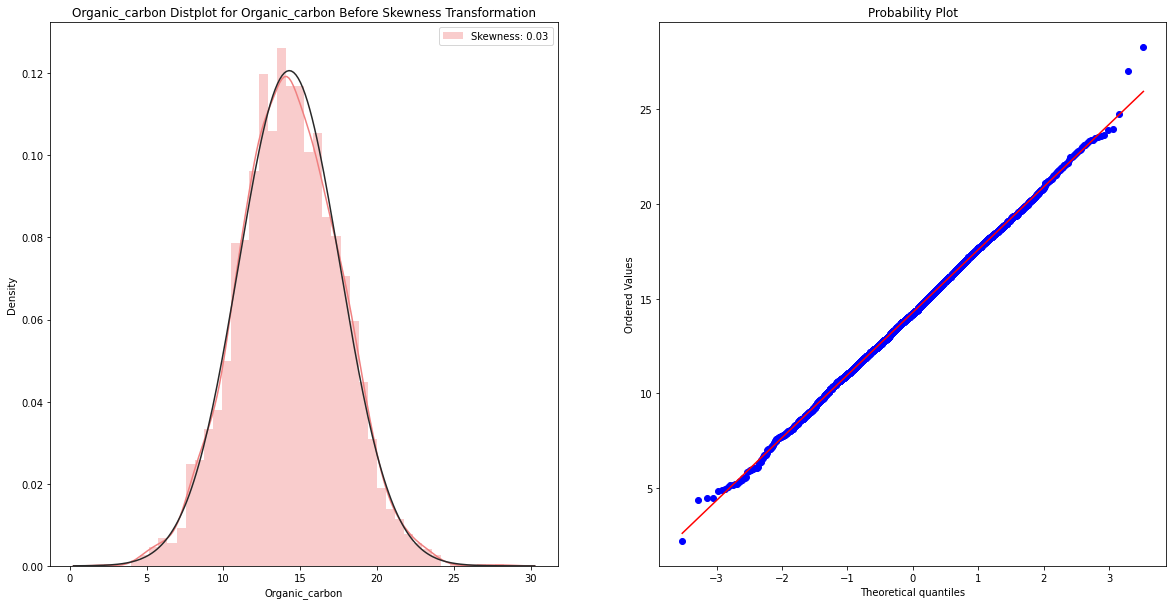

Skewness After Transformation for Organic_carbon:  -0.7828454726247227 

Mean before Transformation for Organic_carbon : 2.7015714762279175, Standard Deviation before Transformation for Organic_carbon : 0.2313260381411243 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



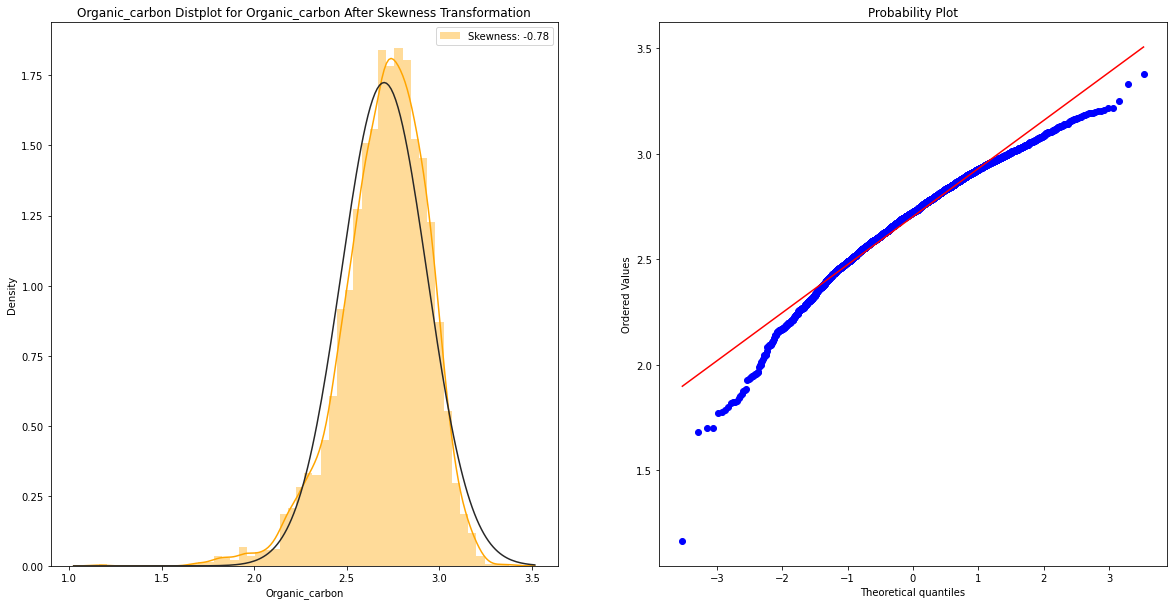

Skewness Before Transformation for Turbidity:  -0.007816642377392644 

Mean before Transformation for Turbidity : 3.966786169791058, Standard Deviation before Transformation for Turbidity : 0.7802632934105393 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



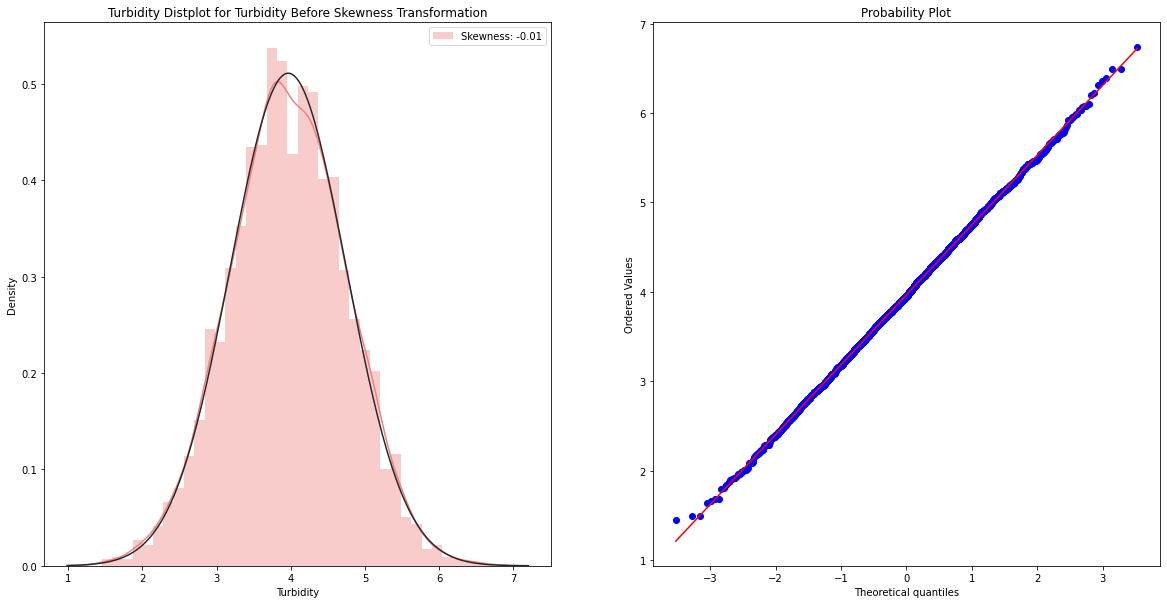

Skewness After Transformation for Turbidity:  -0.505262265357648 

Mean before Transformation for Turbidity : 1.58993671011247, Standard Deviation before Transformation for Turbidity : 0.16238085258160642 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



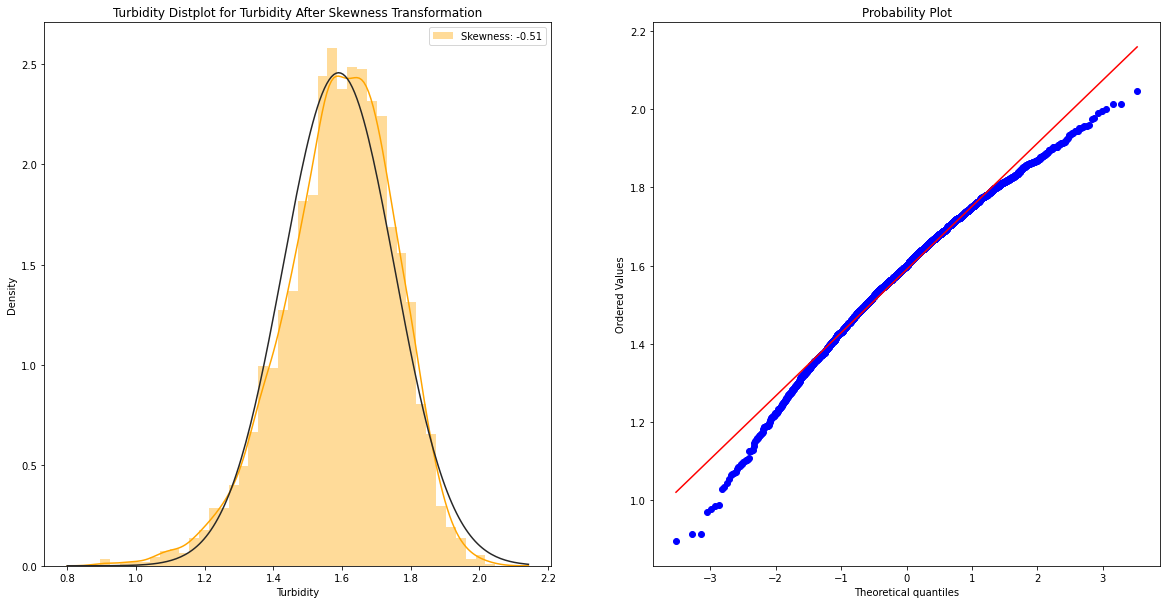

Skewness Before Transformation for Chloramines:  -0.012098440124382135 

Mean before Transformation for Chloramines : 7.122276793425786, Standard Deviation before Transformation for Chloramines : 1.582843252025551 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



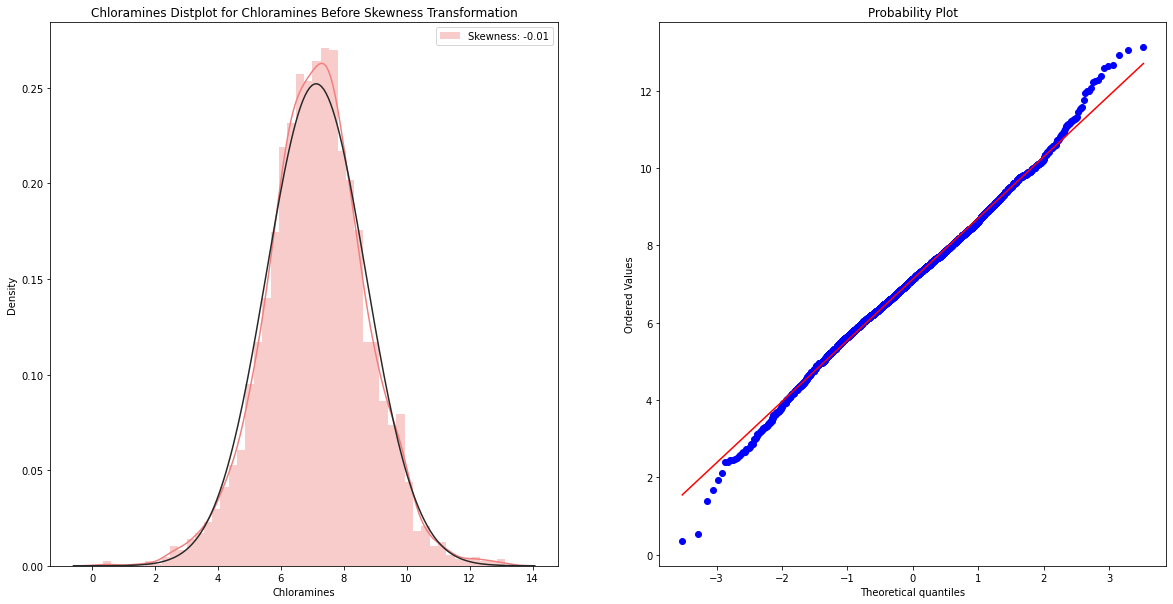

Skewness After Transformation for Chloramines:  -1.0823152409766101 

Mean before Transformation for Chloramines : 2.073942164927734, Standard Deviation before Transformation for Chloramines : 0.2100690308918616 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



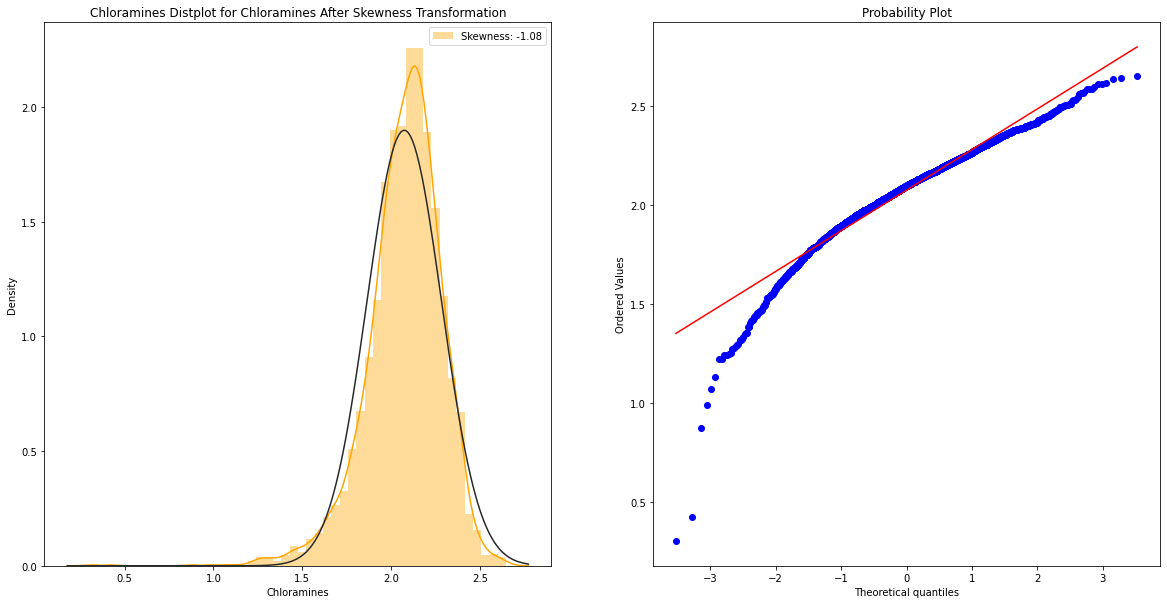

Skewness Before Transformation for Sulfate:  -0.02727780896981166 

Mean before Transformation for Sulfate : 333.6083644296454, Standard Deviation before Transformation for Sulfate : 36.13833427859751 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



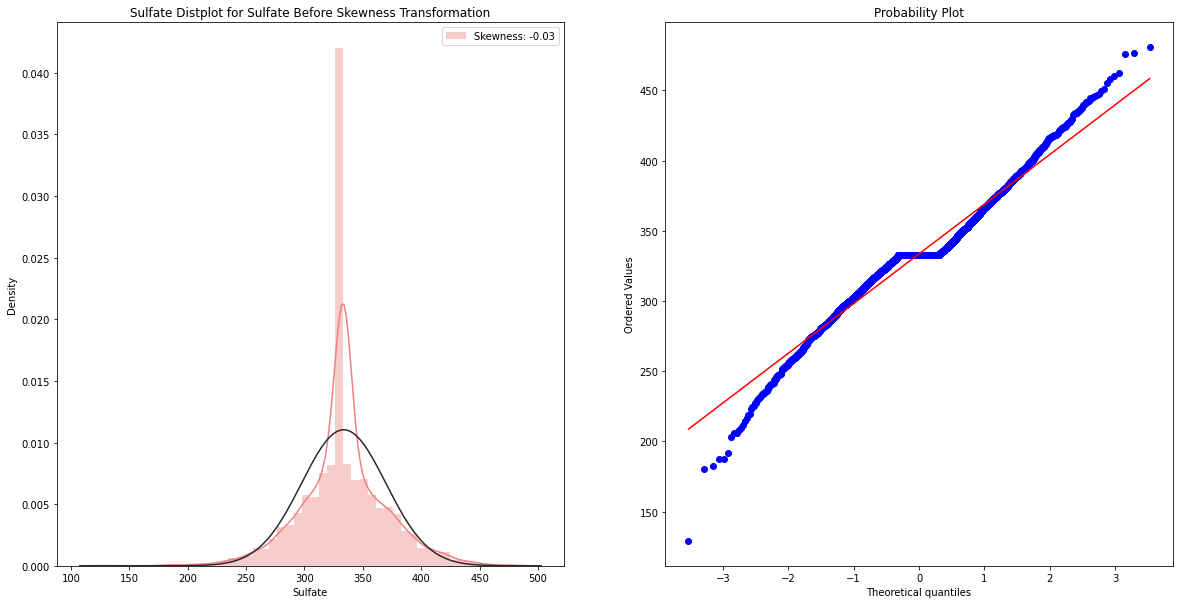

Skewness After Transformation for Sulfate:  -0.7643490789645273 

Mean before Transformation for Sulfate : 5.806931307228754, Standard Deviation before Transformation for Sulfate : 0.11119670079365589 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



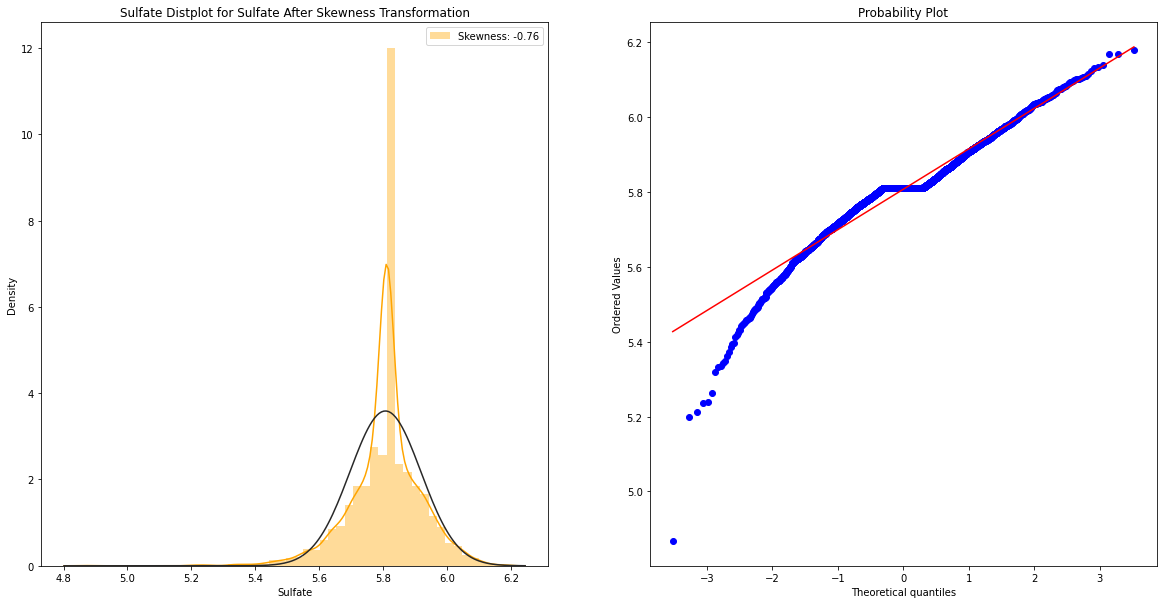

Skewness Before Transformation for Hardness:  -0.03934170477672744 

Mean before Transformation for Hardness : 196.36949601730154, Standard Deviation before Transformation for Hardness : 32.87474281466433 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



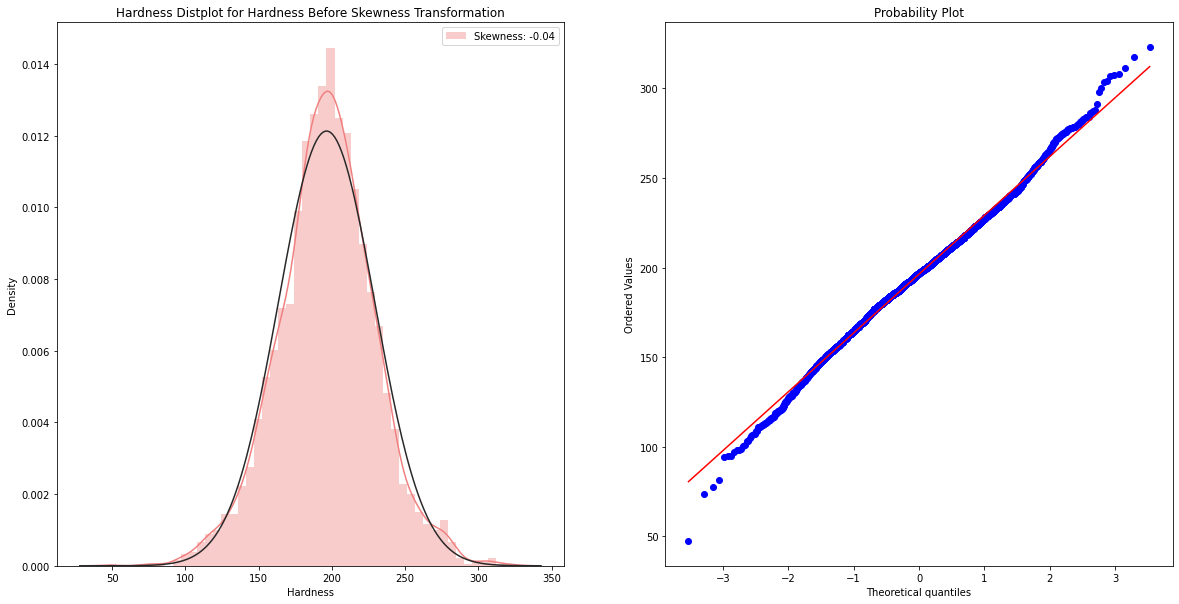

Skewness After Transformation for Hardness:  -0.8457598144523812 

Mean before Transformation for Hardness : 5.270322939745539, Standard Deviation before Transformation for Hardness : 0.17566744540135754 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



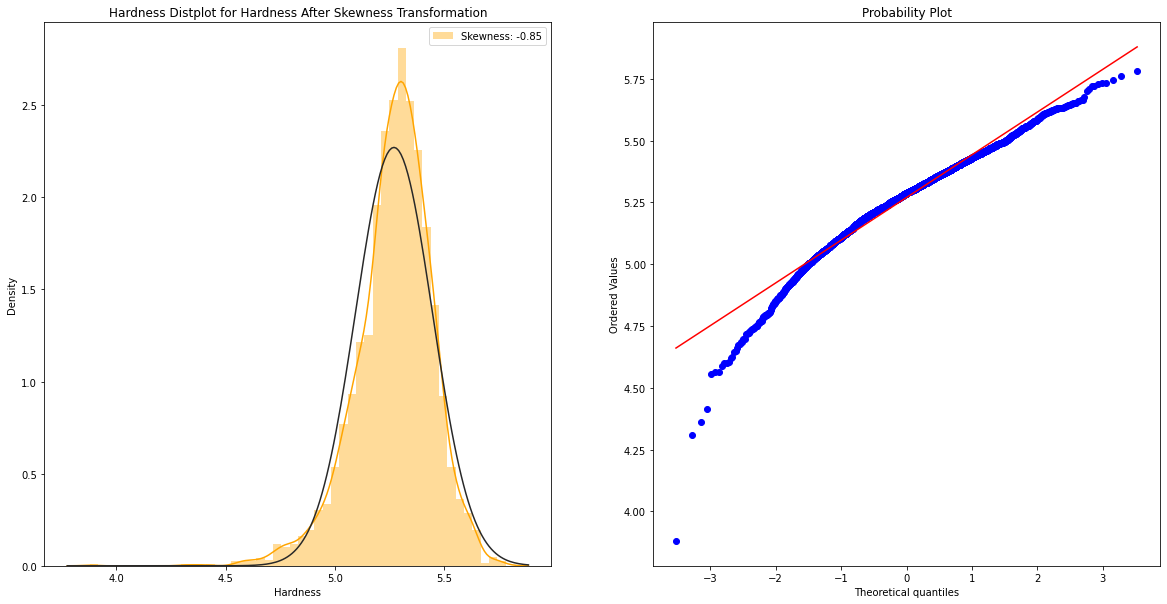

Skewness Before Transformation for Trihalomethanes:  -0.08728878034236116 

Mean before Transformation for Trihalomethanes : 66.40747827293205, Standard Deviation before Transformation for Trihalomethanes : 15.7675504703939 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



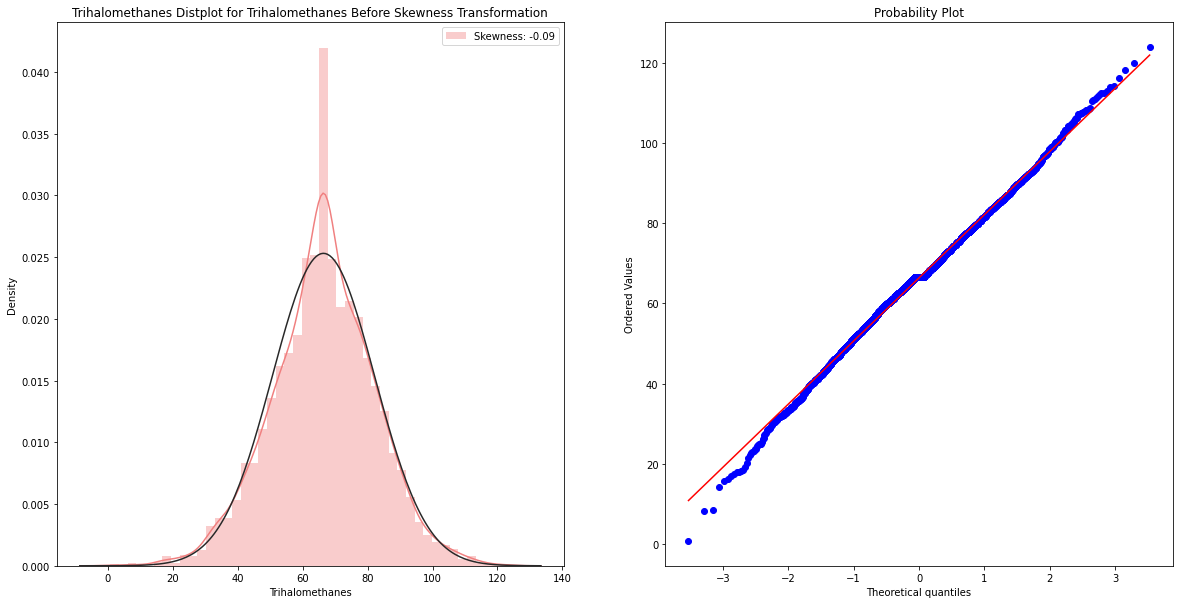

Skewness After Transformation for Trihalomethanes:  -1.8970880884120196 

Mean before Transformation for Trihalomethanes : 4.17903884810977, Standard Deviation before Transformation for Trihalomethanes : 0.2682804174874073 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



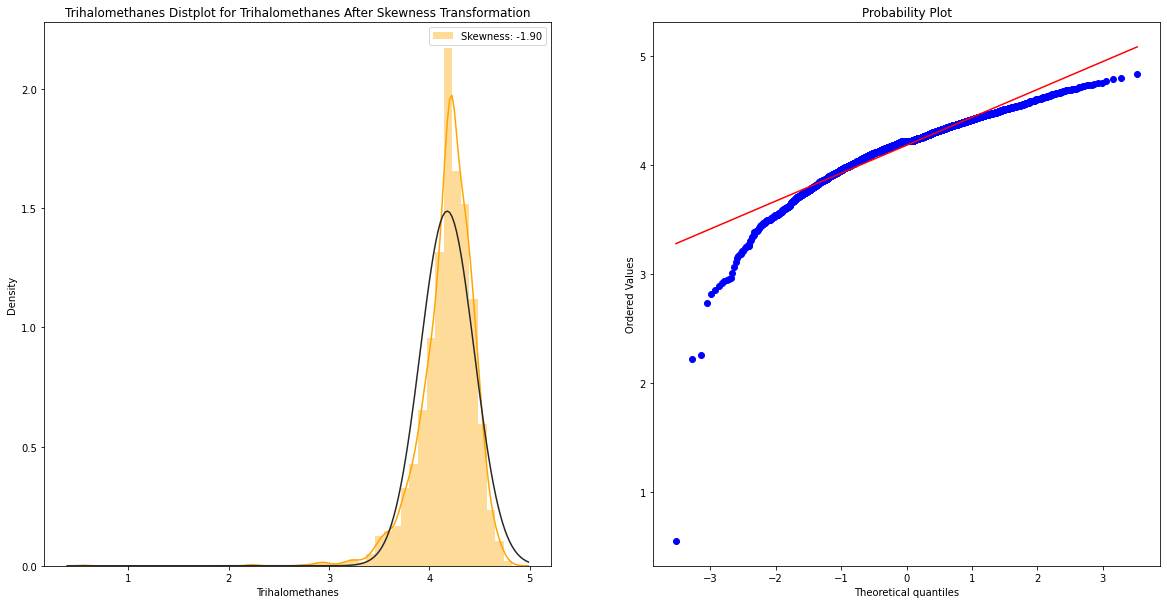

Elapsed Time:  10.547836065292358 seconds



In [52]:
 dadosDF_mod = prep.skewcorrect(dadosDF,except_columns=['Potability'])

In [ ]:
fig = go.Figure(data=[go.Histogram(x=dadosDF['ph'])])
fig.update_layout(title={
        'text': "Distribuição do PH",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  template = "plotly_dark"
                  )

In [ ]:
fig = go.Figure(data=[go.Histogram(x=dadosDF_mod['ph'])])
fig.update_layout(title={
        'text': "Distribuição do PH",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  template = "plotly_dark"
                  )

In [ ]:
fig = px.violin( y=dadosDF['ph'], box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [ ]:
fig = go.Figure(data=[go.Violin(y=dadosDF['ph'],points='all',box_visible=True,x0='water')])
### assign the chart to the figure
fig.update_layout(title={
        'text': "Distribuição do PH",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis=dict(
                            title='Ph',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
### show the plot
fig.show()

In [69]:
X = dadosDF.drop(['Potability','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'], axis = 1).values
y = dadosDF.Potability.values

In [70]:
Xcob = dadosDF_mod.drop(['Potability','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'], axis = 1).values
ycob = dadosDF_mod.Potability.values

In [62]:
from sklearn.model_selection import train_test_split
# Determinando o tamanho das amostras
teste_size = 0.33
# garante que os resultados podem ser reproduzidos
seed = 7

#criando os conjuntos de dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(Xcob,ycob,
                                                        test_size=teste_size,
                                                        random_state = seed,stratify=y)

In [67]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_treino_mod, y_treino_mod = smt.fit_sample(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino_mod)
X_teste = scaler.fit_transform(X_teste)

In [71]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

cv = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, test_idx, in cv.split(X, y):
    X_treino, y_treino = X[train_idx], y[train_idx]
    X_teste, y_teste = X[test_idx], y[test_idx]
    X_treino, y_treino = SMOTE().fit_sample(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.fit_transform(X_teste)

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#criação do modelo
modelo = XGBClassifier()
modelo.fit(X_treino,y_treino)

# Fazendo as previsões e construindo a confusion Matrix
previsoes = modelo.predict(X_teste)
report = classification_report(y_teste,previsoes)

#score
print(report)
modelo.feature_importances_

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       399
           1       0.49      0.53      0.51       256

    accuracy                           0.60       655
   macro avg       0.59      0.59      0.59       655
weighted avg       0.61      0.60      0.61       655



array([0.19723062, 0.12982348, 0.16802926, 0.21810931, 0.28680733],
      dtype=float32)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
#criação do modelo
modelo = KNeighborsClassifier()
modelo.fit(X_treino,y_treino)

# Fazendo as previsões e construindo a confusion Matrix
previsoes = modelo.predict(X_teste)
report = classification_report(y_teste,previsoes)

#score
print(report)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       399
           1       0.54      0.55      0.55       256

    accuracy                           0.64       655
   macro avg       0.62      0.62      0.62       655
weighted avg       0.64      0.64      0.64       655



In [75]:
from sklearn.svm import SVC
#criação do modelo
modelo = SVC()
modelo.fit(X_treino,y_treino)

# Fazendo as previsões e construindo a confusion Matrix
previsoes = modelo.predict(X_teste)
report = classification_report(y_teste,previsoes)

#score
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       399
           1       0.57      0.52      0.54       256

    accuracy                           0.66       655
   macro avg       0.64      0.63      0.63       655
weighted avg       0.65      0.66      0.65       655



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model = Sequential()
model.add(Dense(300,activation='relu'))
model.add(keras.Input(shape=(11,)))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(x=X_treino, 
          y=y_treino, 
          epochs=100,
          validation_data=(X_teste, y_teste), verbose=1
          #callbacks=[early_stop]
          )

Epoch 1/100
69/69 [==============================] - 1s 6ms/step - loss: 0.6783 - accuracy: 0.5953 - val_loss: 0.6567 - val_accuracy: 0.6497
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6290 - val_loss: 0.6382 - val_accuracy: 0.6599
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6335 - val_loss: 0.6225 - val_accuracy: 0.6821
Epoch 4/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.6541 - val_loss: 0.6114 - val_accuracy: 0.6756
Epoch 5/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.6668 - val_loss: 0.6036 - val_accuracy: 0.6876
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.6572 - val_loss: 0.5996 - val_accuracy: 0.6895
Epoch 7/100
69/69 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.6655 - val_loss: 0.5996 - val_accuracy: 0.6904
Epoch 8/100
6

In [ ]:
predictions = model.predict_classes(X_teste)
print(classification_report(y_teste,predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       660
           1       0.65      0.38      0.48       422

    accuracy                           0.68      1082
   macro avg       0.67      0.62      0.62      1082
weighted avg       0.67      0.68      0.65      1082



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

